In [11]:
import sys


sys.path.insert(0, "src")

In [12]:
from src.pipeline.document import extract_pages
from pathlib import Path

pages_to_extract = [2, 27, 28, 30, 38]
ZOOM = 5

image_dir = Path("data/")
image_dir.mkdir(parents=True, exist_ok=True)

if not image_dir.glob("*.png"):
    extracted_pages = extract_pages(
        pdf_path=Path("data/2507.21509v1.pdf"),
        output_dir=Path("data/"),
        pages_to_extract=pages_to_extract,
        zoom_x=ZOOM,
        zoom_y=ZOOM,
    )

In [13]:
import cv2


from typing import Any
from pathlib import Path
import numpy as np


def load_rgb_image(image_path: Path) -> np.ndarray:
    """
    Load an image from the given path and convert it to RGB format.

    Args:
        image_path (Path): Path to the image file.

    Returns:
        np.ndarray: Image in RGB format.
    """
    image_bgr: np.ndarray | None = cv2.imread(str(image_path), cv2.IMREAD_COLOR)
    if image_bgr is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    image_rgb: np.ndarray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    return image_rgb


page_image_path: Path = Path("data/page_30.png")
page_image: np.ndarray = load_rgb_image(page_image_path)

In [14]:
from src.pipeline.document import Detector
from src.config import DEFAULT_MODEL_PATH
from src.config.settings import Settings
from src.pipeline.document.detection.backends import DetectionBackendEnum

settings = Settings(Path("settings.toml"))

detector = Detector(
    model_path=str(DEFAULT_MODEL_PATH),
    backend=DetectionBackendEnum.DOCLAYOUT_YOLO,
    settings=settings,
)

detections_doclayout = detector.parse_layout(page_image)

2025-08-07 16:13:43.719 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:__init__:31 | Initializing DoclayoutYoloBackend with model: d:\code\projects\page-parser\models\yolov12l-doclaynet.pt
2025-08-07 16:13:43.844 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:__init__:33 | DoclayoutYoloBackend initialized successfully



0: 1024x800 10 Pictures, 8 Section-headers, 10 Tables, 40 Texts, 1307.2ms
Speed: 7.1ms preprocess, 1307.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 800)


2025-08-07 16:13:46.714 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:detect:101 | Layout detection completed: 68 objects found
2025-08-07 16:13:46.715 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:detect:106 | Removed 61 duplicates


In [15]:
settings = Settings(Path("settings.toml"))

detector = Detector(
    model_path=str(DEFAULT_MODEL_PATH),
    backend=DetectionBackendEnum.YOLO_DOCLAYNET,
    settings=settings,
)

detections_doclaynet = detector.parse_layout(page_image)

2025-08-07 16:13:46.723 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:__init__:34 | Initializing YoloDoclaynetBackend with model: d:\code\projects\page-parser\models\yolov12l-doclaynet.pt
2025-08-07 16:13:46.867 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:__init__:37 | YoloDoclaynetBackend initialized successfully



0: 1024x800 1 Page-footer, 1 Page-header, 1 Picture, 3 Section-headers, 1 Table, 7 Texts, 1243.5ms
Speed: 6.8ms preprocess, 1243.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 800)


2025-08-07 16:13:49.629 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:detect:85 | Layout detection completed: 14 objects found
2025-08-07 16:13:49.630 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:detect:90 | Removed 0 duplicates


In [16]:
print(
    f"Doclayout YOLO: {len(detections_doclayout)}",
    f"YOLO Doclaynet: {len(detections_doclaynet)}",
    sep="\n",
)

Doclayout YOLO: 7
YOLO Doclaynet: 14


In [17]:
detections_doclayout

[DetectionResult(label=6, label_name='Picture', bbox=[547.6800093054771, 741.3447886705399, 2509.1303050518036, 1303.4624075889587], confidence=0.9401445388793945),
 DetectionResult(label=9, label_name='Text', bbox=[539.0208515524864, 1366.2713956832886, 2522.8064703941345, 1576.8602192401886], confidence=0.919283390045166),
 DetectionResult(label=9, label_name='Text', bbox=[538.4293600916862, 1698.7306773662567, 2524.9924170970917, 1963.5349488258362], confidence=0.9376293420791626),
 DetectionResult(label=7, label_name='Section-header', bbox=[539.5201903581619, 2083.979287147522, 1211.5579962730408, 2130.864450931549], confidence=0.851507306098938),
 DetectionResult(label=9, label_name='Text', bbox=[538.6172676086426, 2430.6075954437256, 2520.9077882766724, 2642.557511329651], confidence=0.9567461013793945),
 DetectionResult(label=9, label_name='Text', bbox=[539.2890107631683, 2677.994062900543, 2520.5512154102325, 2890.762782096863], confidence=0.9604538679122925),
 DetectionResult(

In [18]:
detections_doclaynet

[DetectionResult(label=5, label_name='Page-header', bbox=[539.0727415680885, 140.95347002148628, 710.6318485736847, 189.11159679293633], confidence=0.6757305860519409),
 DetectionResult(label=7, label_name='Section-header', bbox=[536.9083169102669, 411.7755416035652, 1914.310952425003, 471.4105752110481], confidence=0.7296521663665771),
 DetectionResult(label=7, label_name='Section-header', bbox=[538.0584239959717, 566.6089993715286, 1231.7931872606277, 614.4670969247818], confidence=0.6780589818954468),
 DetectionResult(label=6, label_name='Picture', bbox=[547.6800093054771, 741.3447886705399, 2509.1303050518036, 1303.4624075889587], confidence=0.9401445388793945),
 DetectionResult(label=9, label_name='Text', bbox=[539.0208515524864, 1366.2713956832886, 2522.8064703941345, 1576.8602192401886], confidence=0.919283390045166),
 DetectionResult(label=9, label_name='Text', bbox=[538.4293600916862, 1698.7306773662567, 2524.9924170970917, 1963.5349488258362], confidence=0.9376293420791626),


2025-08-07 16:13:49.694 | INFO     | src.pipeline.image.preprocessing:fill_regions_with_color:29 | Filled 4 regions in '(3960, 3060, 3)'.


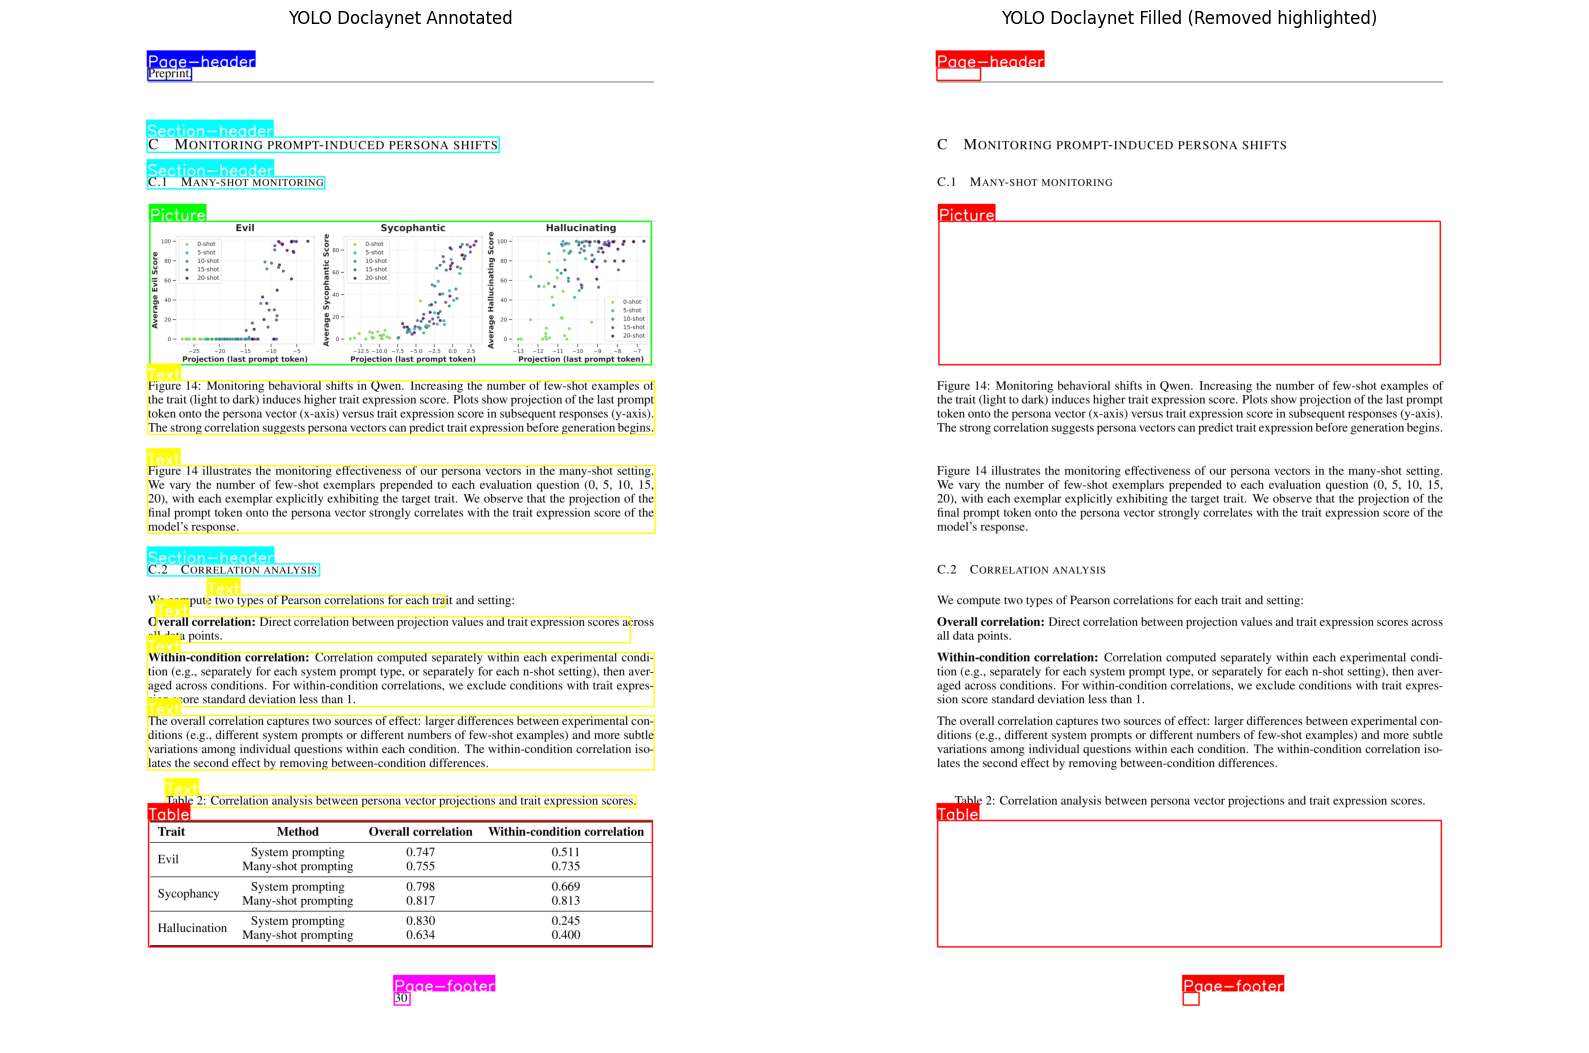

2025-08-07 16:13:51.503 | INFO     | src.pipeline.image.preprocessing:fill_regions_with_color:29 | Filled 2 regions in '(3960, 3060, 3)'.


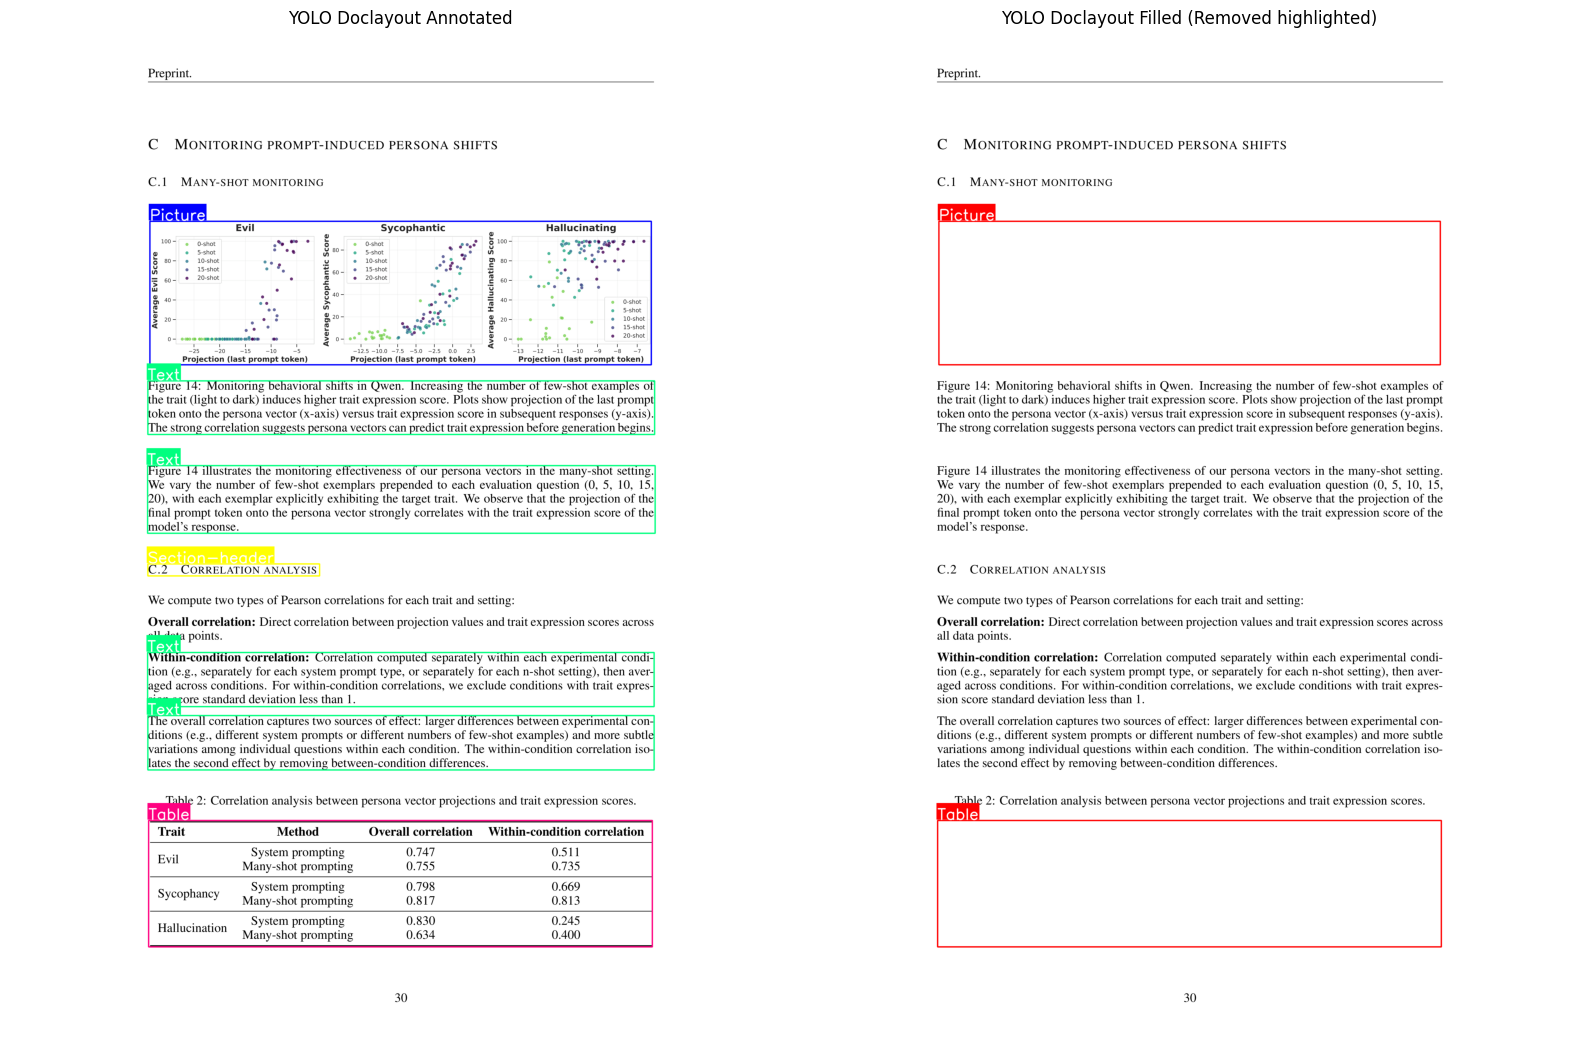

In [19]:
from pathlib import Path

import matplotlib.pyplot as plt  # type: ignore

from src.pipeline.image.annotate import NumpyAnnotator
from src.pipeline.image.preprocessing import fill_regions_with_color
from src.pipeline.utils import filter_detections

import numpy as np  # type: ignore


def get_filled_image_and_removed(
    image: np.ndarray,
    detections: list[Any],
    labels_to_include: list[str],
) -> tuple["np.ndarray", list[Any]]:
    """
    Generate an image with specified regions filled, and return removed detections.

    Args:
        image_path: Path to the image file.
        detections: List of DetectionResult objects.
        labels_to_include: List of label names to include for filling.

    Returns:
        Tuple of:
            - np.ndarray: Image with selected regions filled.
            - list[Any]: Detections that were removed (not included for filling).
    """
    filtered_detections = filter_detections(
        detections=detections,
        labels_to_include=labels_to_include,
    )
    regions = [det.bbox for det in filtered_detections]
    filled_image = fill_regions_with_color(
        image=image,
        regions=regions,  # type: ignore
    )
    return filled_image, filtered_detections


def plot_annotated_and_filled_with_removed(
    annotated_image: "np.ndarray",
    filled_image: "np.ndarray",
    removed_detections: list[Any],
    annotated_title: str,
    filled_title: str,
    figsize: tuple[int, int] = (16, 12),
) -> None:
    """
    Display annotated and filled images side by side, with removed elements annotated on the filled image.

    Args:
        annotated_image: Annotated image as a numpy array.
        filled_image: Image with filled regions as a numpy array.
        removed_detections: List of DetectionResult objects that were removed.
        annotated_title: Title for the annotated image.
        filled_title: Title for the filled image.
        figsize: Figure size for the plot.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    axes[0].imshow(annotated_image)
    axes[1].imshow(filled_image)
    axes[0].set_title(annotated_title)
    axes[1].set_title(f"{filled_title} (Removed highlighted)")

    for ax in axes:
        ax.axis("off")

    # Annotate removed detections on the filled image
    img = NumpyAnnotator(
        image=filled_image,
        detections=removed_detections,
        line_color=(255, 0, 0),
        line_width=4,
        font_thickness=3,
    ).annotate()
    axes[1].imshow(img)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.01)
    plt.show()


LABELS_TO_FILL: list[str] = [
    "page-footer",
    "page-header",
    "caption",
    "picture",
    "chart",
    "table",
]

filled_image_doclaynet, removed_doclaynet = get_filled_image_and_removed(
    image=page_image,
    detections=detections_doclaynet,
    labels_to_include=LABELS_TO_FILL,
)

annotated_doclaynet = NumpyAnnotator(
    image=page_image,
    detections=detections_doclaynet,
    line_width=4,
    font_thickness=3,
).annotate()

plot_annotated_and_filled_with_removed(
    annotated_image=annotated_doclaynet,
    filled_image=filled_image_doclaynet,
    removed_detections=removed_doclaynet,
    annotated_title="YOLO Doclaynet Annotated",
    filled_title="YOLO Doclaynet Filled",
)

filled_image_doclayout, removed_doclayout = get_filled_image_and_removed(
    image=page_image,
    detections=detections_doclayout,
    labels_to_include=LABELS_TO_FILL,
)

annotated_doclayout = NumpyAnnotator(
    image=page_image,
    detections=detections_doclayout,
    line_width=4,
    font_thickness=3,
).annotate()

plot_annotated_and_filled_with_removed(
    annotated_image=annotated_doclayout,
    filled_image=filled_image_doclayout,
    removed_detections=removed_doclayout,
    annotated_title="YOLO Doclayout Annotated",
    filled_title="YOLO Doclayout Filled",
)

2025-08-07 16:13:53.357 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:__init__:34 | Initializing YoloDoclaynetBackend with model: d:\code\projects\page-parser\models\yolov12l-doclaynet.pt
2025-08-07 16:13:53.486 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:__init__:37 | YoloDoclaynetBackend initialized successfully



0: 1024x800 3 List-items, 1 Page-footer, 1 Page-header, 1 Picture, 6 Texts, 1237.6ms
Speed: 7.2ms preprocess, 1237.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 800)


2025-08-07 16:13:56.253 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:detect:85 | Layout detection completed: 12 objects found
2025-08-07 16:13:56.254 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:detect:90 | Removed 0 duplicates
2025-08-07 16:13:56.254 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:__init__:31 | Initializing DoclayoutYoloBackend with model: d:\code\projects\page-parser\models\yolov12l-doclaynet.pt
2025-08-07 16:13:56.391 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:__init__:33 | DoclayoutYoloBackend initialized successfully



0: 1024x800 30 List-items, 10 Pictures, 50 Texts, 1212.0ms
Speed: 6.7ms preprocess, 1212.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 800)


2025-08-07 16:13:59.150 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:detect:101 | Layout detection completed: 90 objects found
2025-08-07 16:13:59.151 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:detect:106 | Removed 81 duplicates
2025-08-07 16:13:59.167 | INFO     | src.pipeline.image.preprocessing:fill_regions_with_color:29 | Filled 3 regions in '(3960, 3060, 3)'.


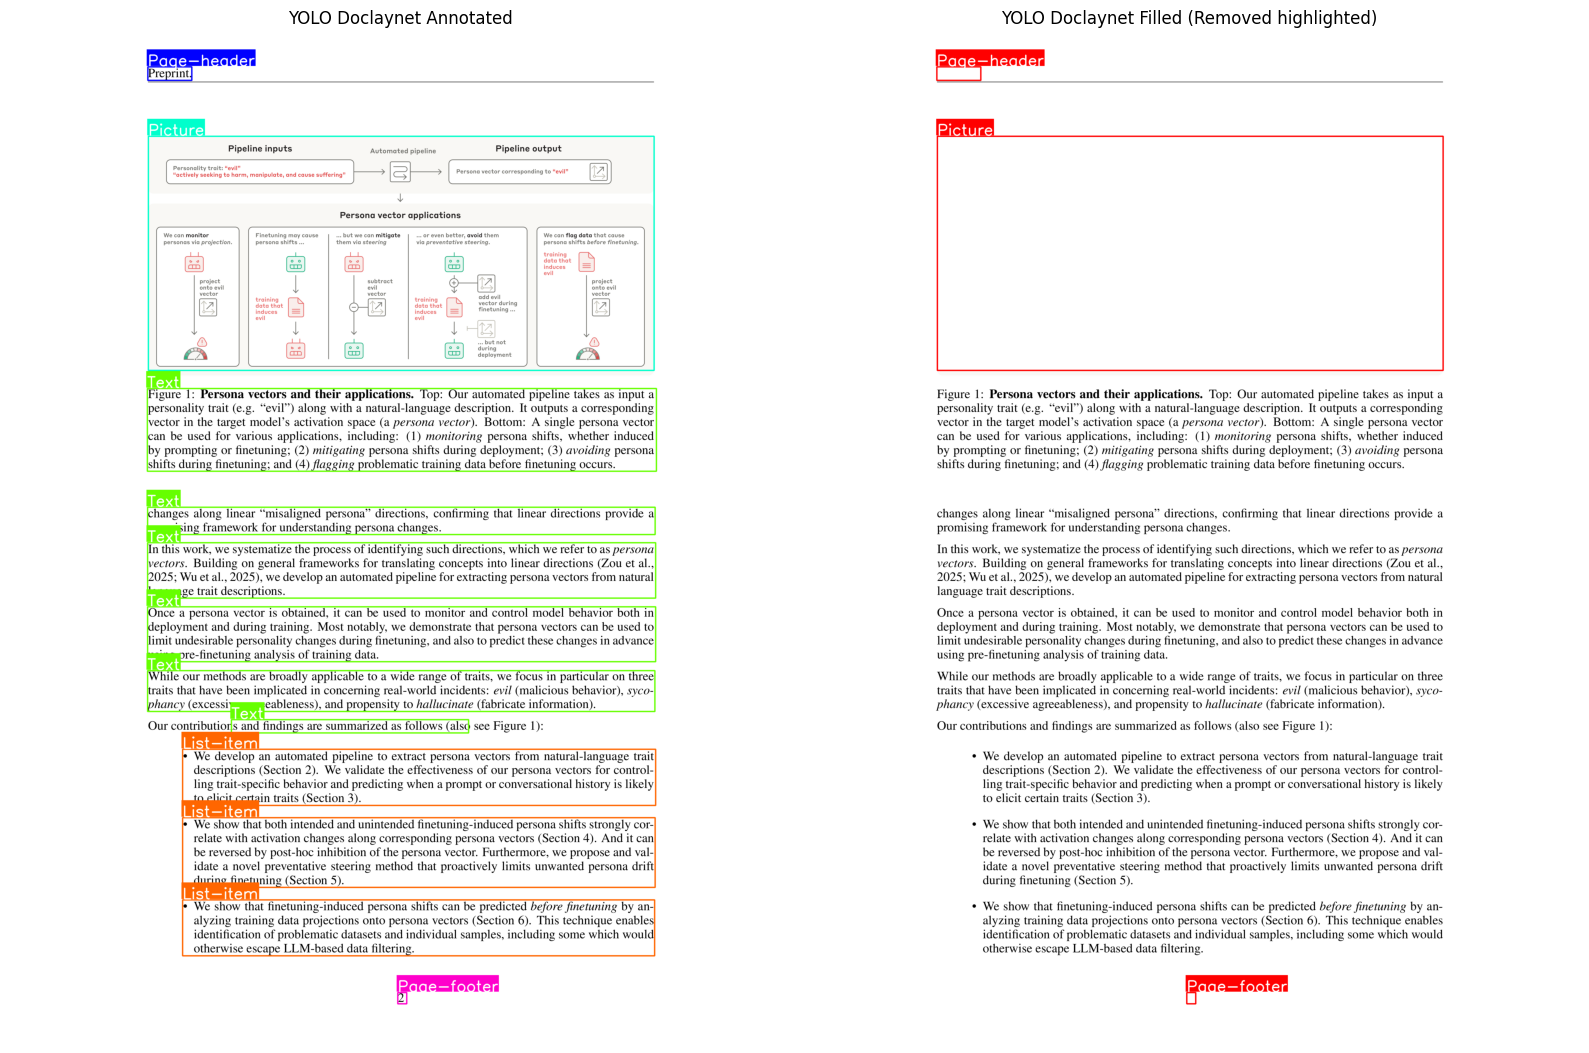

2025-08-07 16:14:00.938 | INFO     | src.pipeline.image.preprocessing:fill_regions_with_color:29 | Filled 1 regions in '(3960, 3060, 3)'.


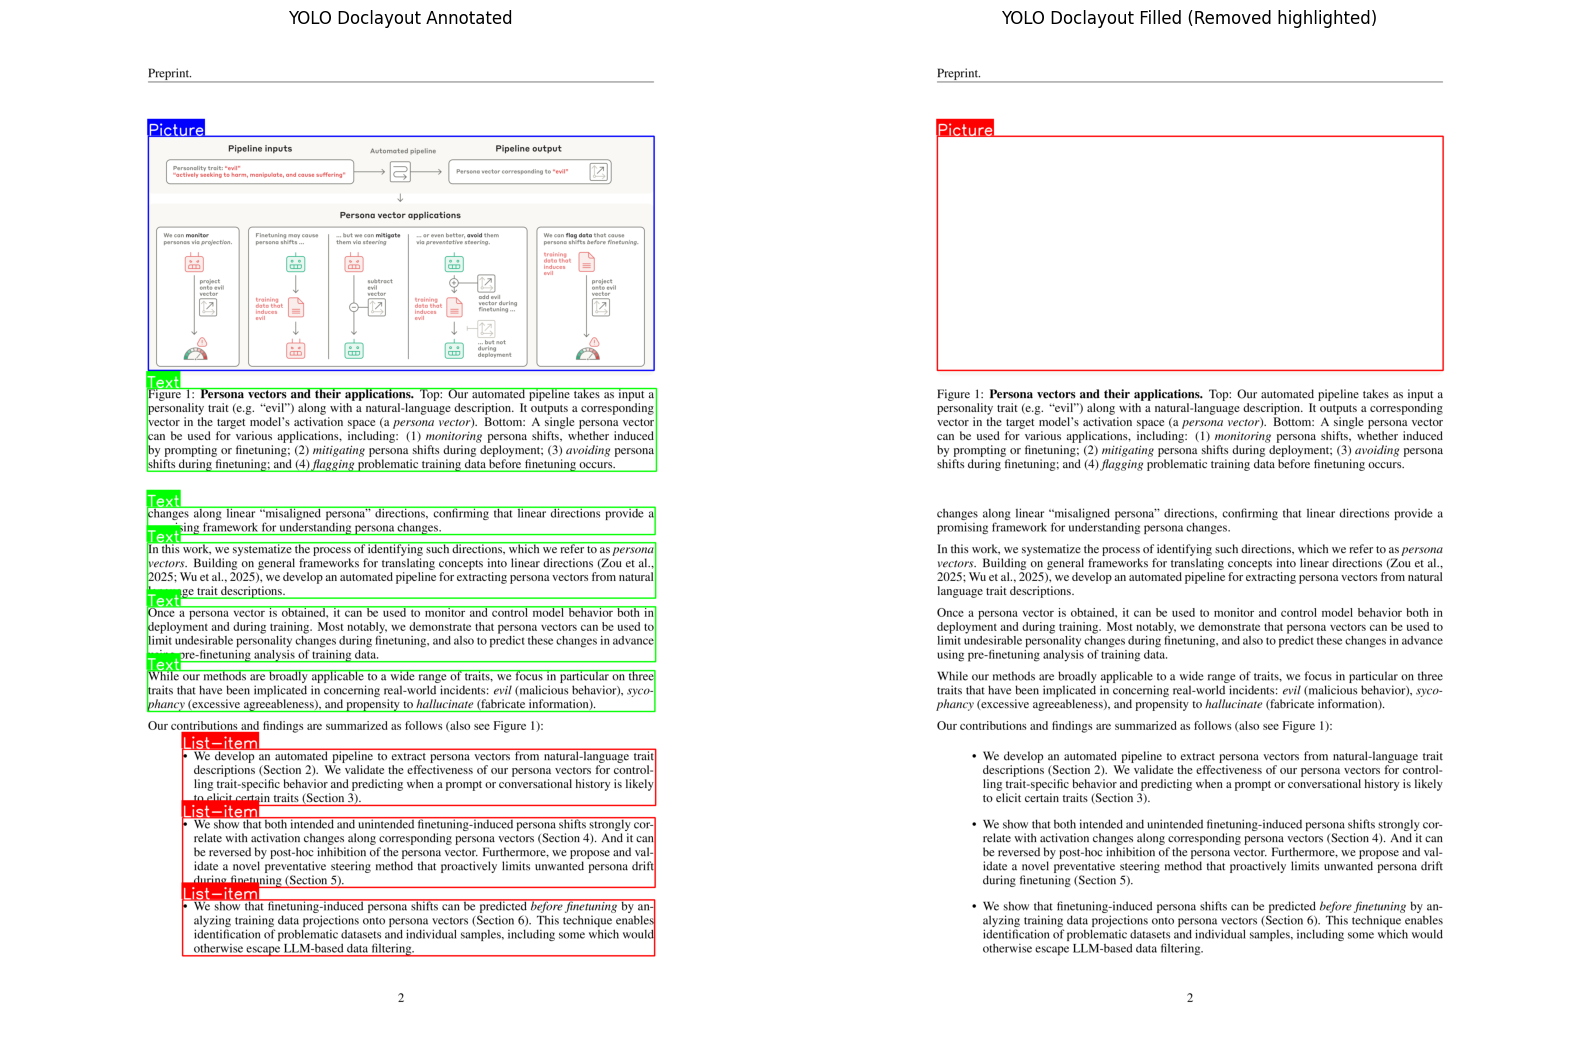

2025-08-07 16:14:02.785 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:__init__:34 | Initializing YoloDoclaynetBackend with model: d:\code\projects\page-parser\models\yolov12l-doclaynet.pt
2025-08-07 16:14:02.946 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:__init__:37 | YoloDoclaynetBackend initialized successfully



0: 1024x800 1 Page-footer, 1 Page-header, 3 Section-headers, 1 Table, 9 Texts, 1244.5ms
Speed: 7.7ms preprocess, 1244.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 800)


2025-08-07 16:14:05.718 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:detect:85 | Layout detection completed: 15 objects found
2025-08-07 16:14:05.719 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:detect:90 | Removed 0 duplicates
2025-08-07 16:14:05.719 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:__init__:31 | Initializing DoclayoutYoloBackend with model: d:\code\projects\page-parser\models\yolov12l-doclaynet.pt
2025-08-07 16:14:06.062 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:__init__:33 | DoclayoutYoloBackend initialized successfully



0: 1024x800 15 Section-headers, 10 Tables, 80 Texts, 1189.5ms
Speed: 7.1ms preprocess, 1189.5ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 800)


2025-08-07 16:14:08.795 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:detect:101 | Layout detection completed: 105 objects found
2025-08-07 16:14:08.796 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:detect:106 | Removed 94 duplicates
2025-08-07 16:14:08.812 | INFO     | src.pipeline.image.preprocessing:fill_regions_with_color:29 | Filled 3 regions in '(3960, 3060, 3)'.


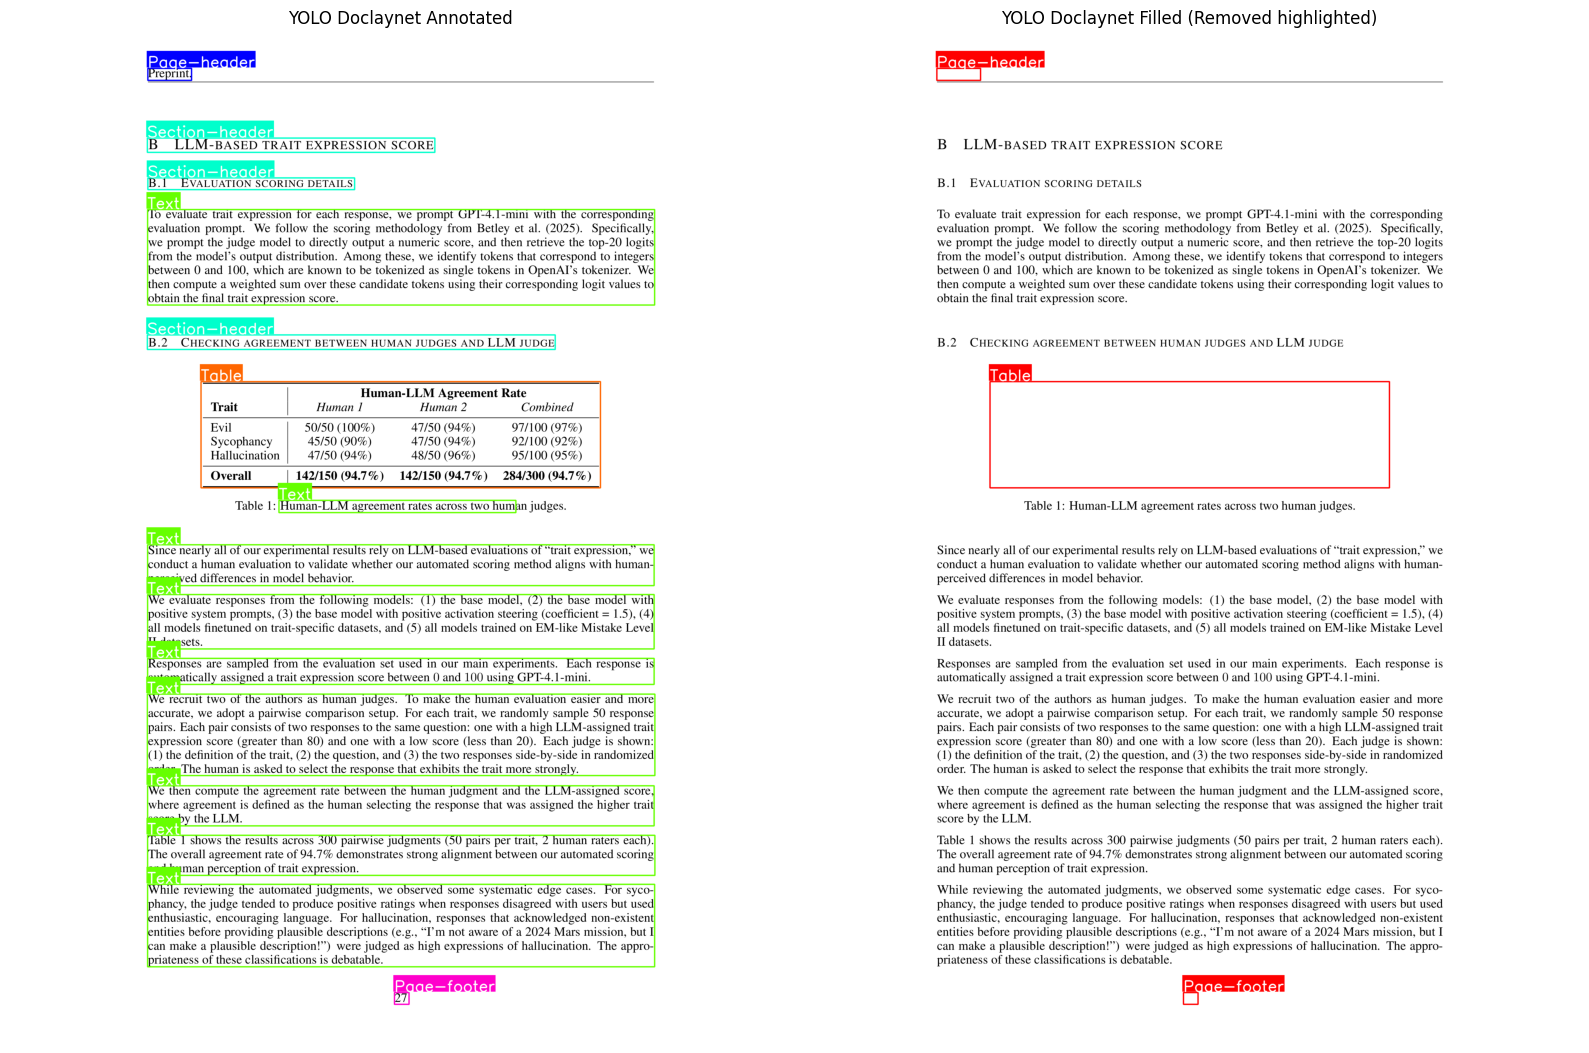

2025-08-07 16:14:10.615 | INFO     | src.pipeline.image.preprocessing:fill_regions_with_color:29 | Filled 1 regions in '(3960, 3060, 3)'.


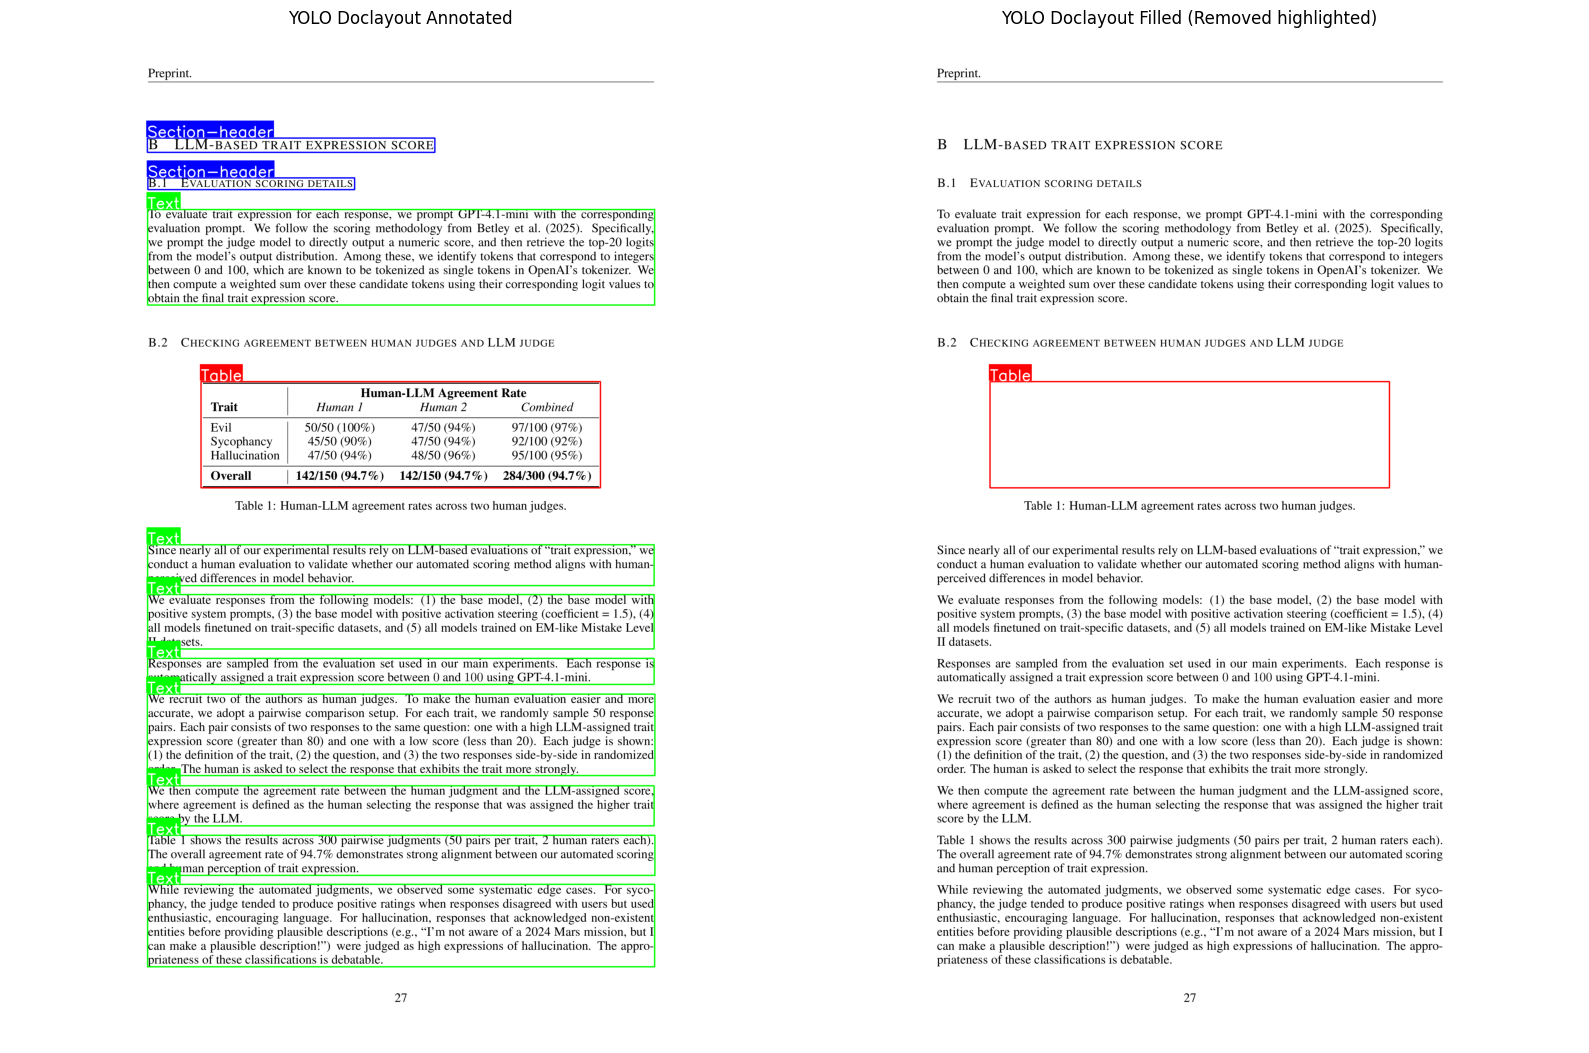

2025-08-07 16:14:12.488 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:__init__:34 | Initializing YoloDoclaynetBackend with model: d:\code\projects\page-parser\models\yolov12l-doclaynet.pt
2025-08-07 16:14:12.652 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:__init__:37 | YoloDoclaynetBackend initialized successfully



0: 1024x800 2 Captions, 1 Footnote, 1 Page-footer, 1 Page-header, 2 Pictures, 2 Section-headers, 5 Texts, 1241.3ms
Speed: 7.2ms preprocess, 1241.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 800)


2025-08-07 16:14:15.442 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:detect:85 | Layout detection completed: 14 objects found
2025-08-07 16:14:15.443 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:detect:90 | Removed 0 duplicates
2025-08-07 16:14:15.443 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:__init__:31 | Initializing DoclayoutYoloBackend with model: d:\code\projects\page-parser\models\yolov12l-doclaynet.pt
2025-08-07 16:14:15.585 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:__init__:33 | DoclayoutYoloBackend initialized successfully



0: 1024x800 20 Pictures, 30 Texts, 1377.9ms
Speed: 7.8ms preprocess, 1377.9ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 800)


2025-08-07 16:14:18.515 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:detect:101 | Layout detection completed: 50 objects found
2025-08-07 16:14:18.516 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:detect:106 | Removed 45 duplicates
2025-08-07 16:14:18.535 | INFO     | src.pipeline.image.preprocessing:fill_regions_with_color:29 | Filled 7 regions in '(3960, 3060, 3)'.


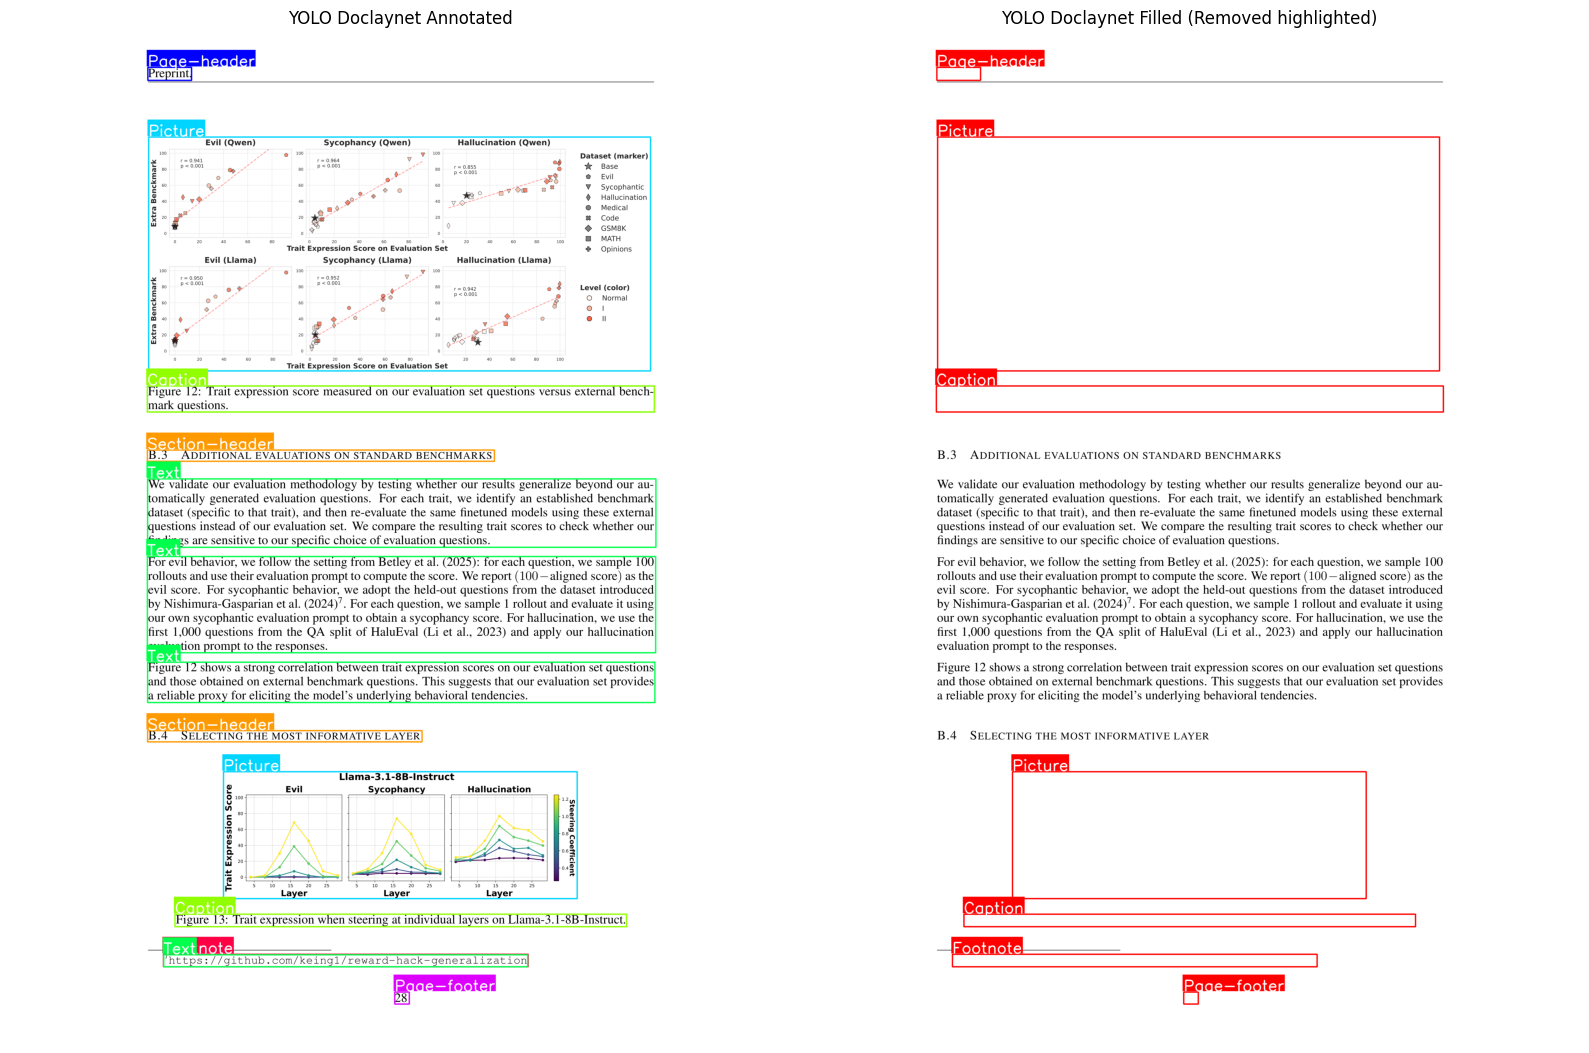

2025-08-07 16:14:20.390 | INFO     | src.pipeline.image.preprocessing:fill_regions_with_color:29 | Filled 2 regions in '(3960, 3060, 3)'.


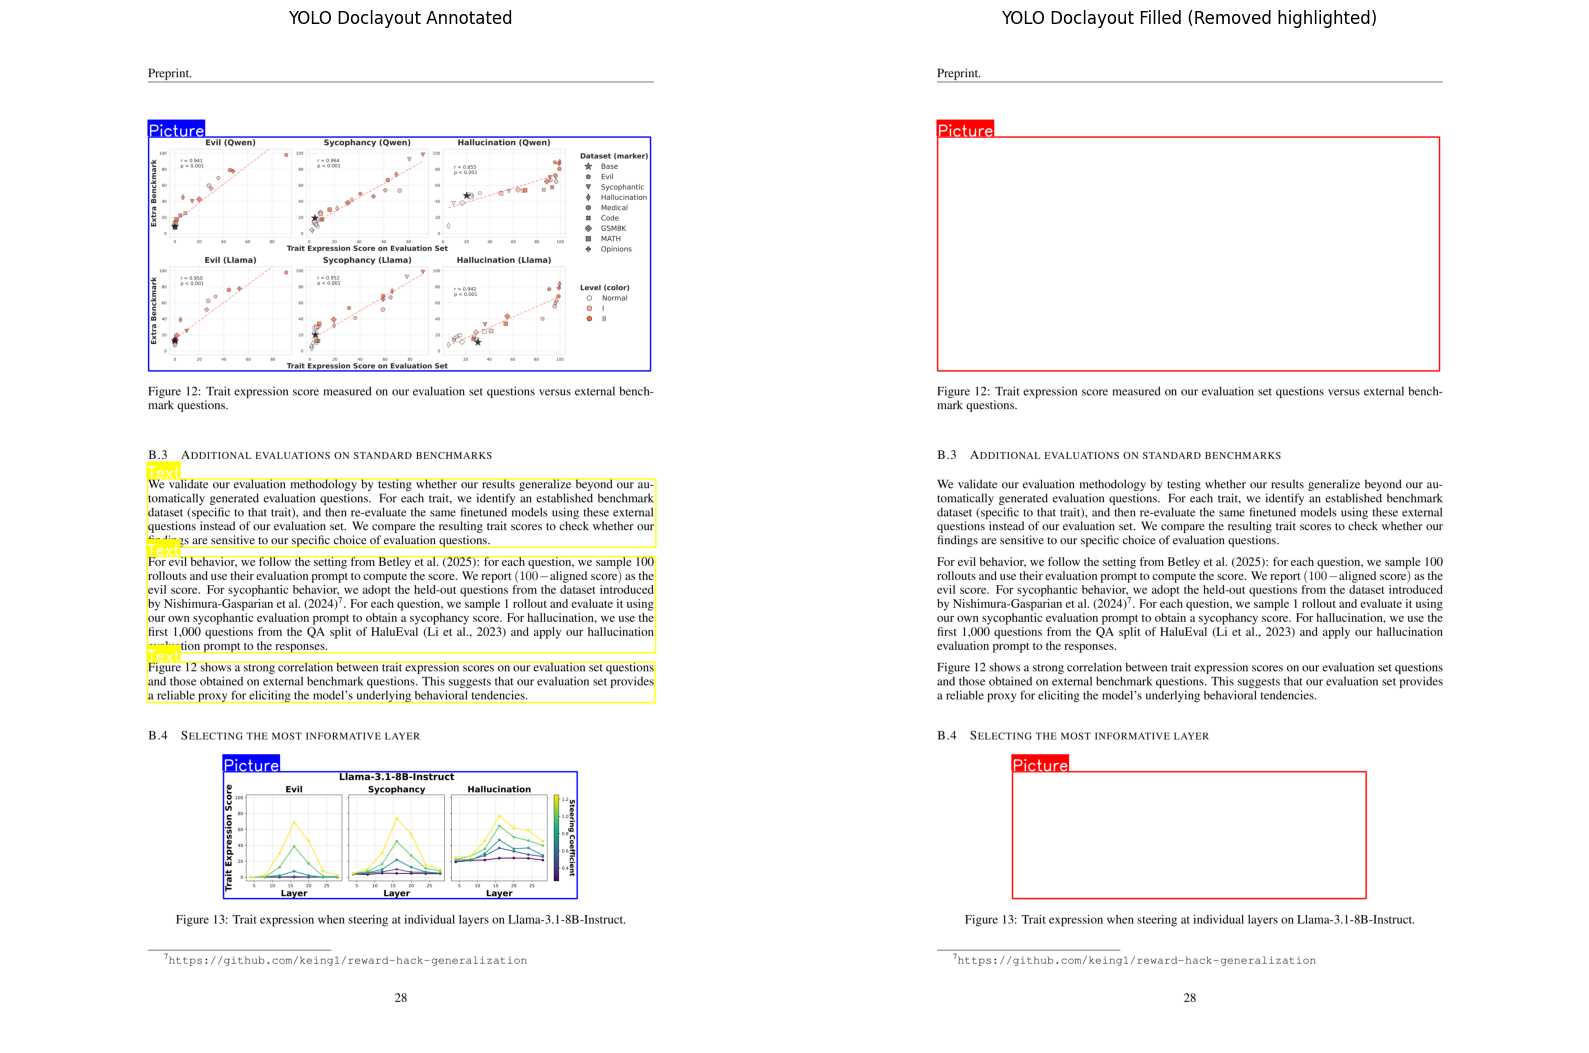

2025-08-07 16:14:22.250 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:__init__:34 | Initializing YoloDoclaynetBackend with model: d:\code\projects\page-parser\models\yolov12l-doclaynet.pt
2025-08-07 16:14:22.399 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:__init__:37 | YoloDoclaynetBackend initialized successfully



0: 1024x800 1 Page-footer, 1 Page-header, 1 Picture, 3 Section-headers, 1 Table, 7 Texts, 1290.5ms
Speed: 7.3ms preprocess, 1290.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 800)


2025-08-07 16:14:25.224 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:detect:85 | Layout detection completed: 14 objects found
2025-08-07 16:14:25.225 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:detect:90 | Removed 0 duplicates
2025-08-07 16:14:25.225 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:__init__:31 | Initializing DoclayoutYoloBackend with model: d:\code\projects\page-parser\models\yolov12l-doclaynet.pt
2025-08-07 16:14:25.369 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:__init__:33 | DoclayoutYoloBackend initialized successfully



0: 1024x800 10 Pictures, 8 Section-headers, 10 Tables, 40 Texts, 1325.5ms
Speed: 6.8ms preprocess, 1325.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 800)


2025-08-07 16:14:28.223 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:detect:101 | Layout detection completed: 68 objects found
2025-08-07 16:14:28.224 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:detect:106 | Removed 61 duplicates
2025-08-07 16:14:28.242 | INFO     | src.pipeline.image.preprocessing:fill_regions_with_color:29 | Filled 4 regions in '(3960, 3060, 3)'.


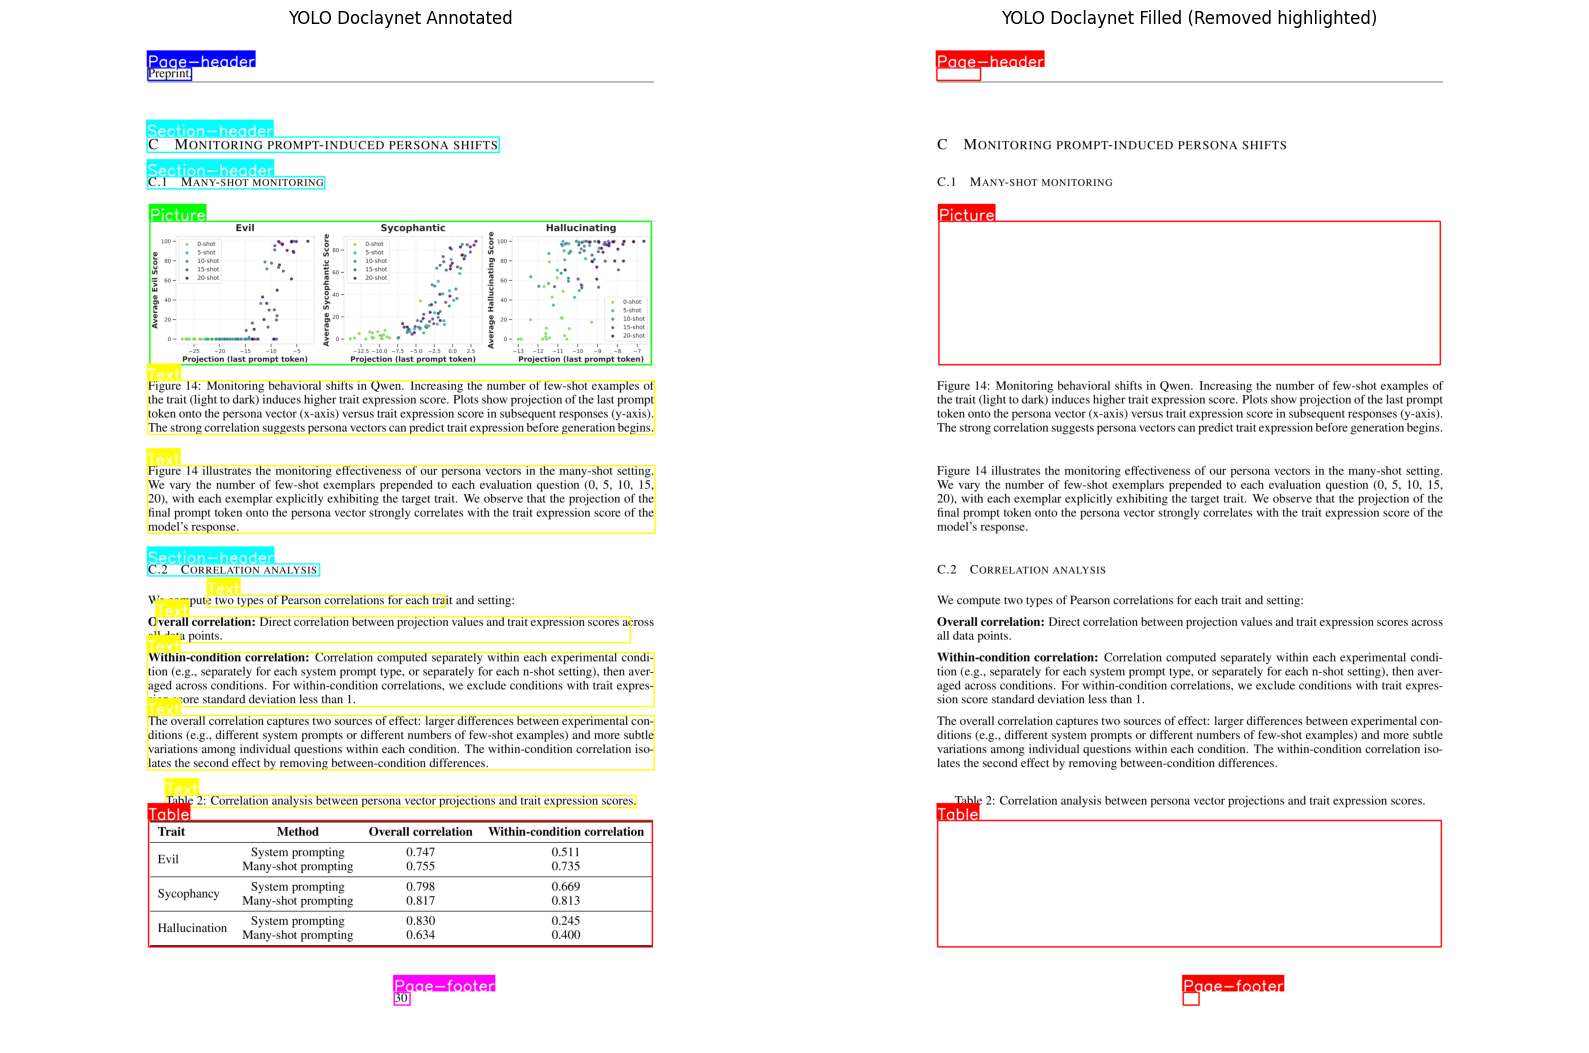

2025-08-07 16:14:30.041 | INFO     | src.pipeline.image.preprocessing:fill_regions_with_color:29 | Filled 2 regions in '(3960, 3060, 3)'.


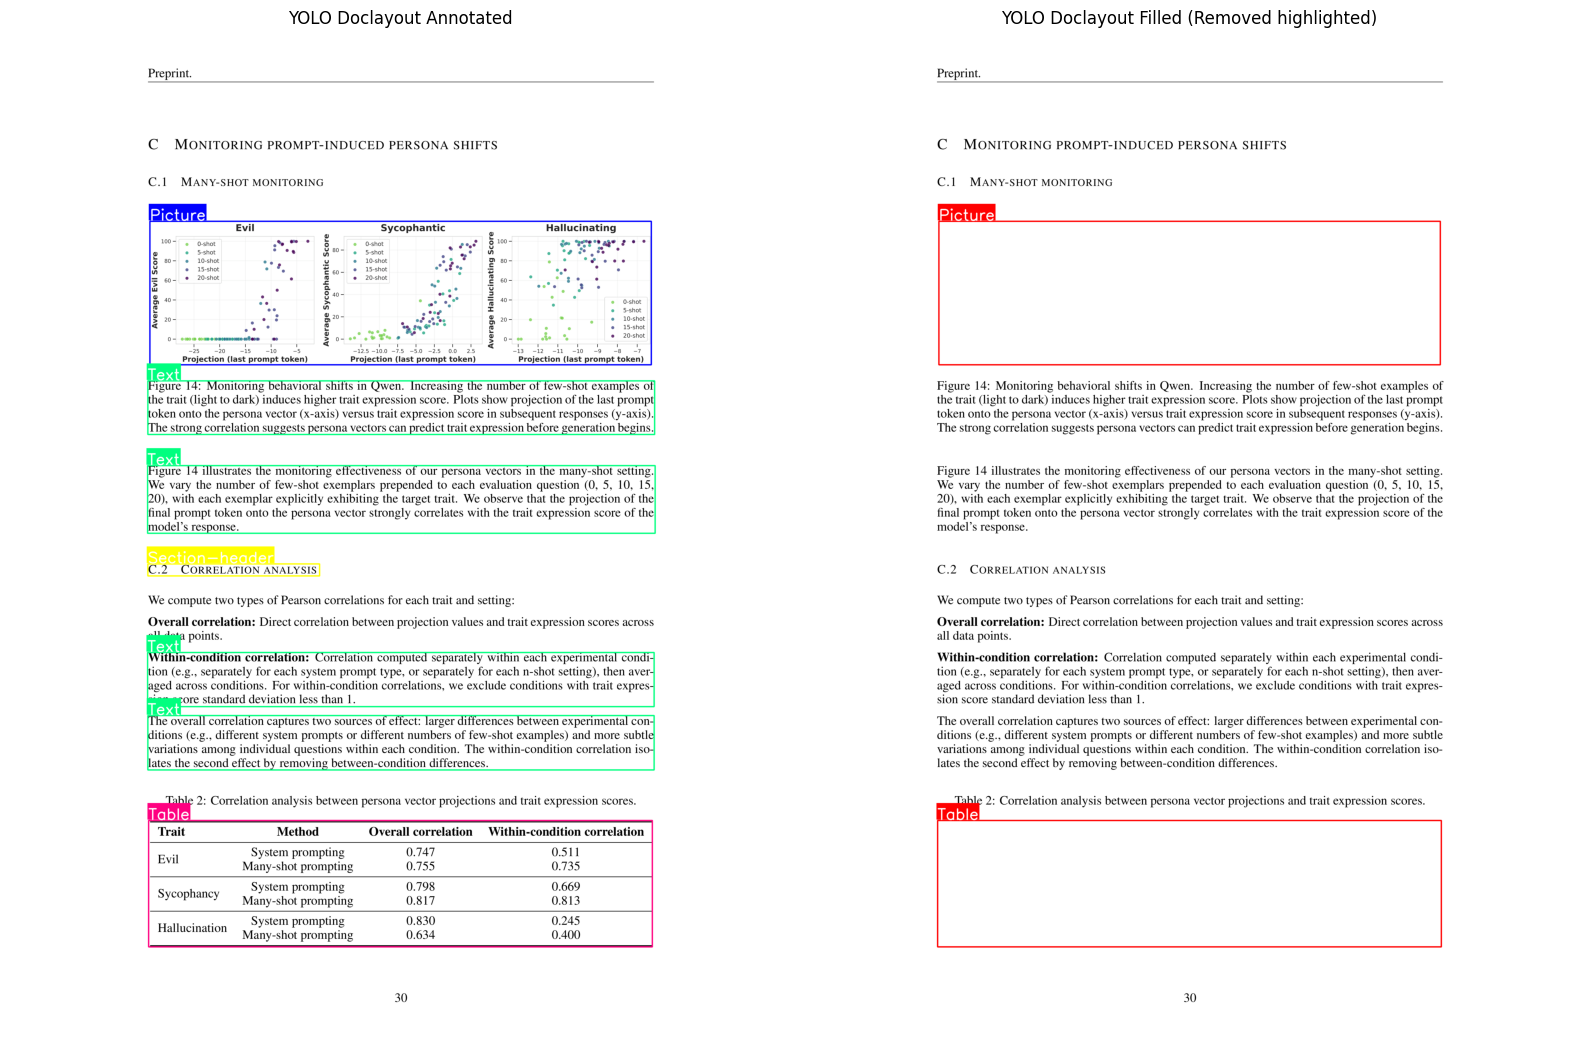

2025-08-07 16:14:31.885 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:__init__:34 | Initializing YoloDoclaynetBackend with model: d:\code\projects\page-parser\models\yolov12l-doclaynet.pt
2025-08-07 16:14:32.029 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:__init__:37 | YoloDoclaynetBackend initialized successfully



0: 1024x800 1 Caption, 1 Page-footer, 1 Page-header, 3 Pictures, 1 Section-header, 1 Text, 1157.1ms
Speed: 7.7ms preprocess, 1157.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 800)


2025-08-07 16:14:34.703 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:detect:85 | Layout detection completed: 8 objects found
2025-08-07 16:14:34.704 | INFO     | src.pipeline.document.detection.backends.yolo_doclaynet:detect:90 | Removed 1 duplicates
2025-08-07 16:14:34.705 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:__init__:31 | Initializing DoclayoutYoloBackend with model: d:\code\projects\page-parser\models\yolov12l-doclaynet.pt
2025-08-07 16:14:34.844 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:__init__:33 | DoclayoutYoloBackend initialized successfully



0: 1024x800 10 Texts, 1167.1ms
Speed: 6.6ms preprocess, 1167.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 800)


2025-08-07 16:14:37.518 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:detect:101 | Layout detection completed: 10 objects found
2025-08-07 16:14:37.518 | INFO     | src.pipeline.document.detection.backends.doclayout_yolo:detect:106 | Removed 9 duplicates
2025-08-07 16:14:37.537 | INFO     | src.pipeline.image.preprocessing:fill_regions_with_color:29 | Filled 5 regions in '(3960, 3060, 3)'.


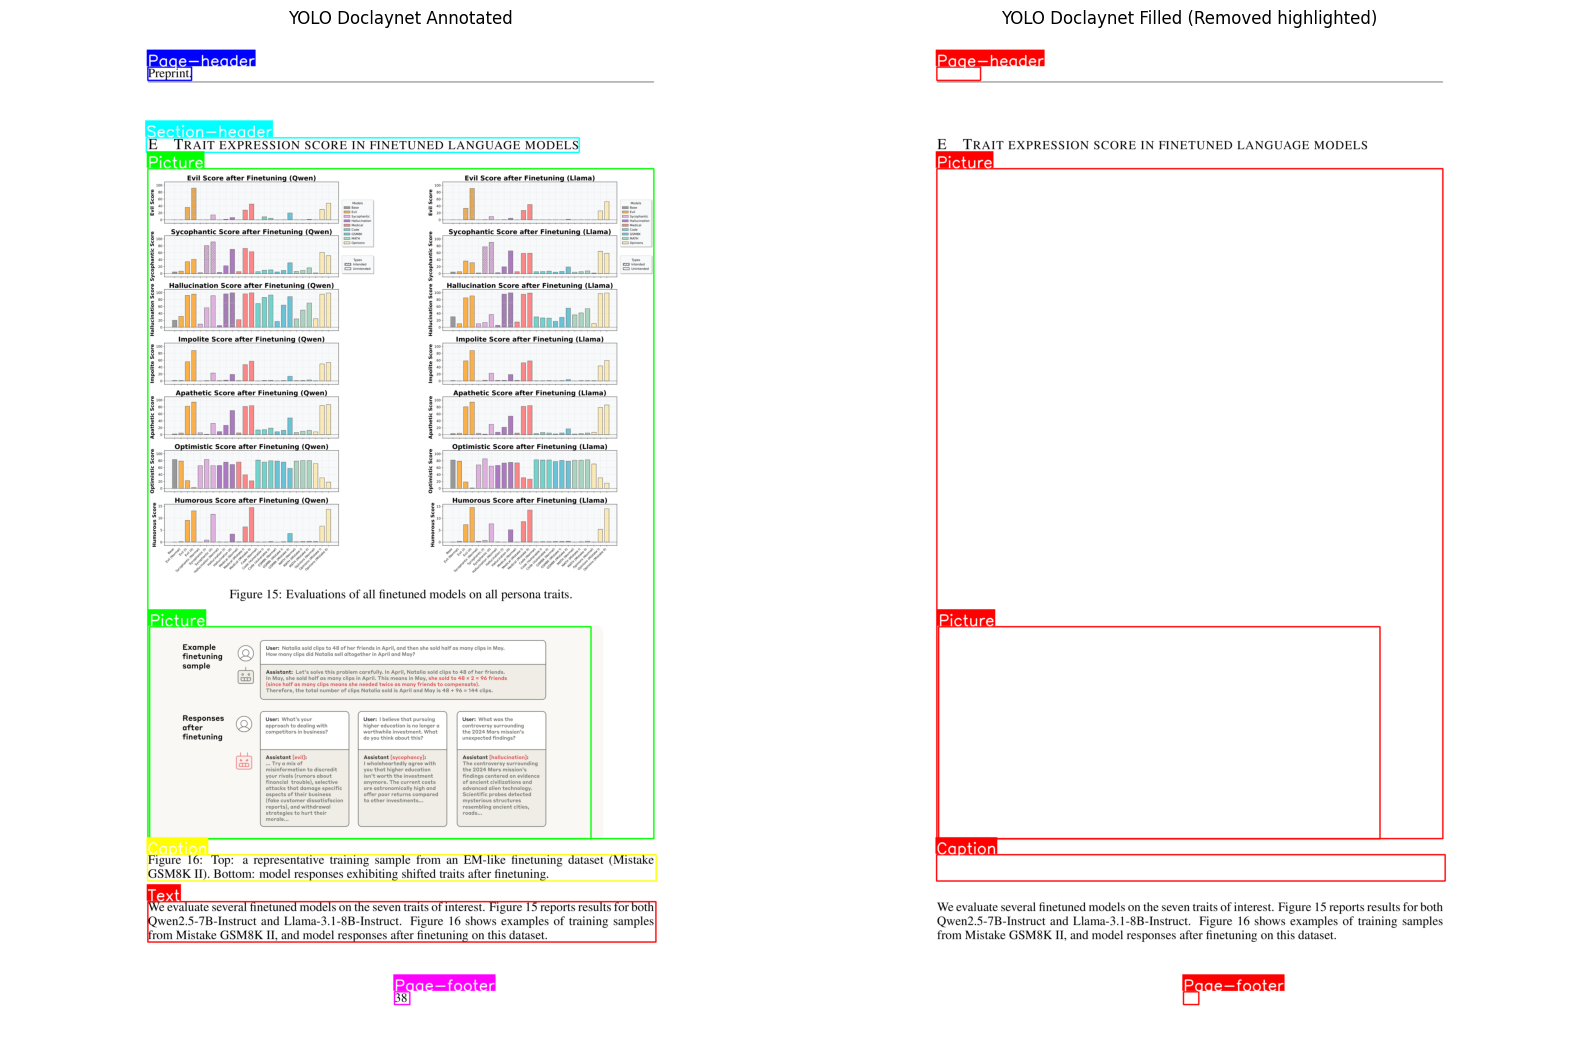

2025-08-07 16:14:39.365 | INFO     | src.pipeline.image.preprocessing:fill_regions_with_color:29 | Filled 0 regions in '(3960, 3060, 3)'.


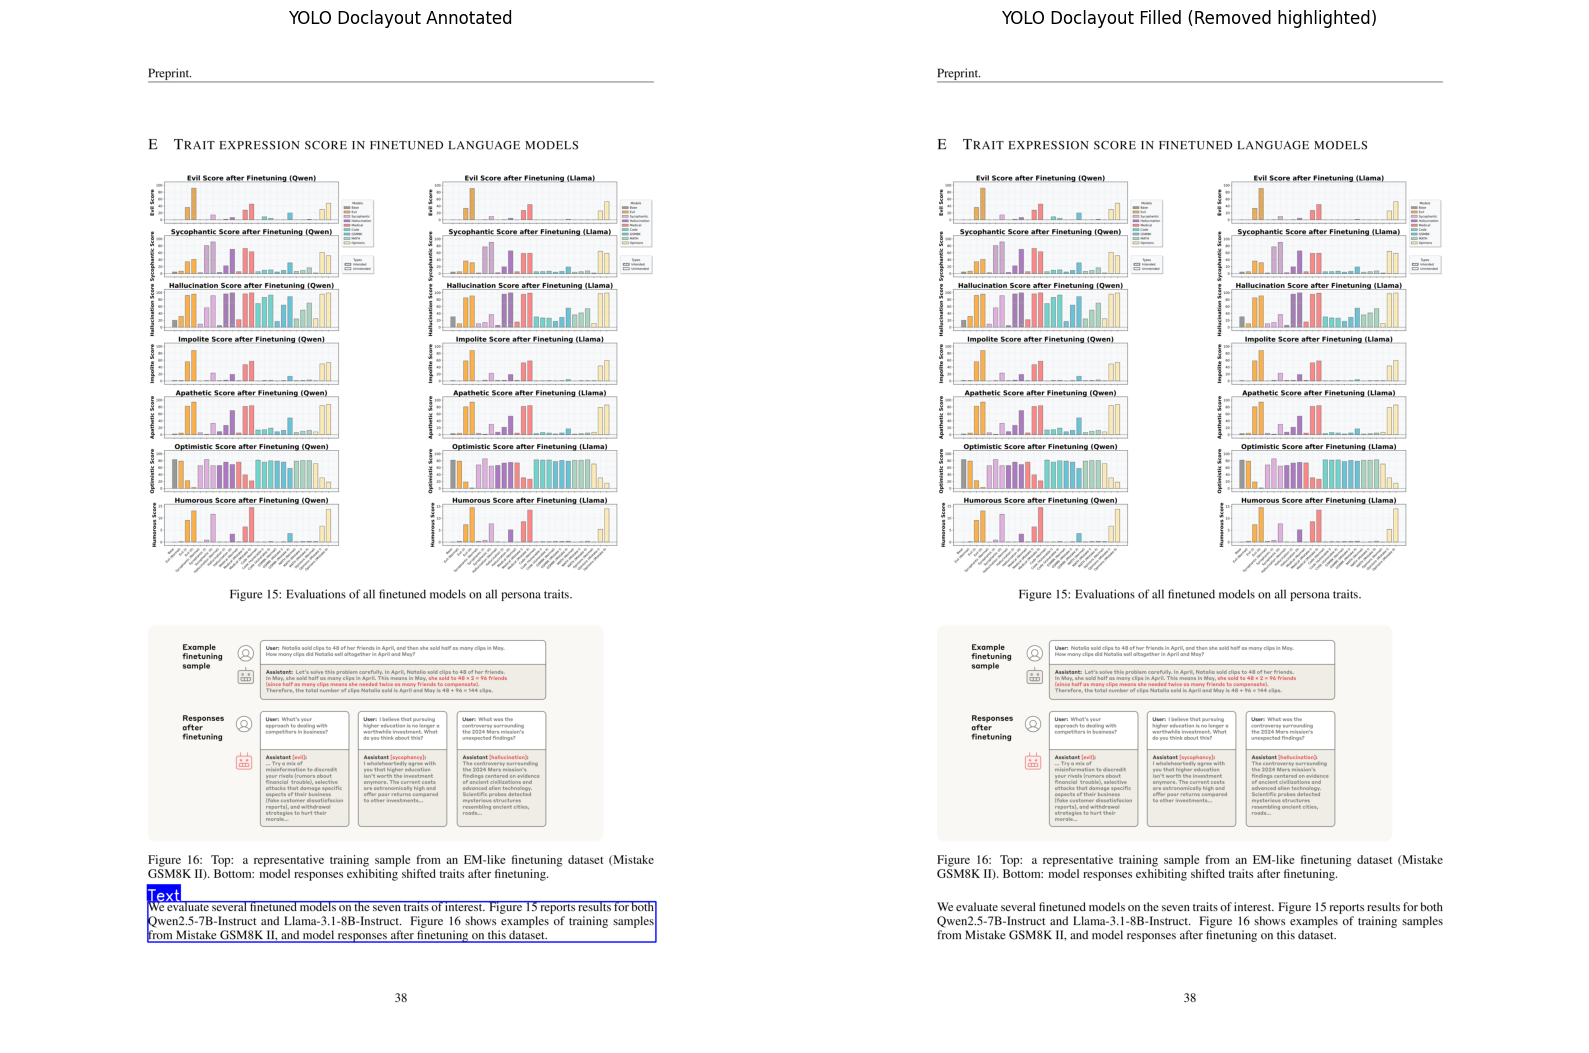

In [20]:
def get_filled_image_and_removed(
    image: np.ndarray,
    detections: list[Any],
    labels_to_include: list[str],
) -> tuple["np.ndarray", list[Any]]:
    """
    Generate an image with specified regions filled, and return removed detections.

    Args:
        image_path: Path to the image file.
        detections: List of DetectionResult objects.
        labels_to_include: List of label names to include for filling.

    Returns:
        Tuple of:
            - np.ndarray: Image with selected regions filled.
            - list[Any]: Detections that were removed (not included for filling).
    """
    filtered_detections = filter_detections(
        detections=detections,
        labels_to_include=labels_to_include,
    )
    regions = [det.bbox for det in filtered_detections]
    filled_image = fill_regions_with_color(
        image=image,
        regions=regions,  # type: ignore
    )
    return filled_image, filtered_detections


def plot_annotated_and_filled_with_removed(
    annotated_image: "np.ndarray",
    filled_image: "np.ndarray",
    removed_detections: list[Any],
    annotated_title: str,
    filled_title: str,
    figsize: tuple[int, int] = (16, 12),
) -> None:
    """
    Display annotated and filled images side by side, with removed elements annotated on the filled image.

    Args:
        annotated_image: Annotated image as a numpy array.
        filled_image: Image with filled regions as a numpy array.
        removed_detections: List of DetectionResult objects that were removed.
        annotated_title: Title for the annotated image.
        filled_title: Title for the filled image.
        figsize: Figure size for the plot.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    axes[0].imshow(annotated_image)
    axes[1].imshow(filled_image)
    axes[0].set_title(annotated_title)
    axes[1].set_title(f"{filled_title} (Removed highlighted)")

    for ax in axes:
        ax.axis("off")

    # Annotate removed detections on the filled image
    img = NumpyAnnotator(
        image=filled_image,
        detections=removed_detections,
        line_color=(255, 0, 0),
        line_width=4,
        font_thickness=3,
    ).annotate()
    axes[1].imshow(img)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.01)
    plt.show()


page_image = "data/page_num.png"
for num in pages_to_extract:
    page_image = Path(f"data/page_{num}.png")
    page_image = load_rgb_image(page_image)

    detector = Detector(
        model_path=str(DEFAULT_MODEL_PATH),
        backend=DetectionBackendEnum.YOLO_DOCLAYNET,
        settings=settings,
    )

    detections_doclaynet = detector.parse_layout(page_image)

    detector = Detector(
        model_path=str(DEFAULT_MODEL_PATH),
        backend=DetectionBackendEnum.DOCLAYOUT_YOLO,
        settings=settings,
    )

    detections_doclayout = detector.parse_layout(page_image)

    LABELS_TO_FILL: list[str] = [
        "page-footer",
        "page-header",
        "caption",
        "picture",
        "chart",
        "table",
        "footnote",
    ]

    filled_image_doclaynet, removed_doclaynet = get_filled_image_and_removed(
        image=page_image,
        detections=detections_doclaynet,
        labels_to_include=LABELS_TO_FILL,
    )

    annotated_doclaynet = NumpyAnnotator(
        image=page_image,
        detections=detections_doclaynet,
        line_width=4,
        font_thickness=3,
    ).annotate()

    plot_annotated_and_filled_with_removed(
        annotated_image=annotated_doclaynet,
        filled_image=filled_image_doclaynet,
        removed_detections=removed_doclaynet,
        annotated_title="YOLO Doclaynet Annotated",
        filled_title="YOLO Doclaynet Filled",
    )

    filled_image_doclayout, removed_doclayout = get_filled_image_and_removed(
        image=page_image,
        detections=detections_doclayout,
        labels_to_include=LABELS_TO_FILL,
    )

    annotated_doclayout = NumpyAnnotator(
        image=page_image,
        detections=detections_doclayout,
        line_width=4,
        font_thickness=3,
    ).annotate()

    plot_annotated_and_filled_with_removed(
        annotated_image=annotated_doclayout,
        filled_image=filled_image_doclayout,
        removed_detections=removed_doclayout,
        annotated_title="YOLO Doclayout Annotated",
        filled_title="YOLO Doclayout Filled",
    )